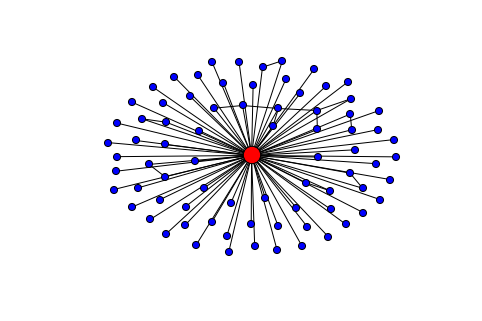

In [2]:
%matplotlib inline
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
Example using the NetworkX ego_graph() function to return the main egonet of
the largest hub in a Barabási-Albert network.
"""
__author__="""Drew Conway (drew.conway@nyu.edu)"""

from operator import itemgetter
import networkx as nx
import matplotlib.pyplot as plt


if __name__ == '__main__':
    # Create a BA model graph
    n=1000
    m=2
    G=nx.generators.barabasi_albert_graph(n,m)
    # find node with largest degree
    node_and_degree=G.degree()
    (largest_hub,degree)=sorted(node_and_degree.items(),key=itemgetter(1))[-1]
    # Create ego graph of main hub
    hub_ego=nx.ego_graph(G,largest_hub)
    # Draw graph
    pos=nx.spring_layout(hub_ego)
    nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=False)
    # Draw ego as large and red
    nx.draw_networkx_nodes(hub_ego,pos,nodelist=[largest_hub],node_size=300,node_color='r')
    plt.savefig('ego_graph.png')
    plt.show()

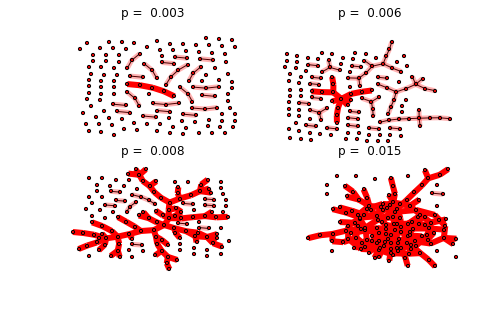

In [3]:
#!/usr/bin/env python
"""
This example illustrates the sudden appearance of a
giant connected component in a binomial random graph.

Requires pygraphviz and matplotlib to draw.

"""
#    Copyright (C) 2006-2008
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

try:
    import matplotlib.pyplot as plt
except:
    raise

import networkx as nx
import math

try:
    from networkx import graphviz_layout
    layout=nx.graphviz_layout
except ImportError:
    print("PyGraphviz not found; drawing with spring layout; will be slow.")
    layout=nx.spring_layout


n=150  # 150 nodes
# p value at which giant component (of size log(n) nodes) is expected
p_giant=1.0/(n-1)
# p value at which graph is expected to become completely connected
p_conn=math.log(n)/float(n)

# the following range of p values should be close to the threshold
pvals=[0.003, 0.006, 0.008, 0.015]

region=220 # for pylab 2x2 subplot layout
plt.subplots_adjust(left=0,right=1,bottom=0,top=0.95,wspace=0.01,hspace=0.01)
for p in pvals:
    G=nx.binomial_graph(n,p)
    pos=layout(G)
    region+=1
    plt.subplot(region)
    plt.title("p = %6.3f"%(p))
    nx.draw(G,pos,
            with_labels=False,
            node_size=10
            )
    # identify largest connected component
    Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
    G0=Gcc[0]
    nx.draw_networkx_edges(G0,pos,
                           with_labels=False,
                           edge_color='r',
                           width=6.0
                        )
    # show other connected components
    for Gi in Gcc[1:]:
       if len(Gi)>1:
          nx.draw_networkx_edges(Gi,pos,
                                 with_labels=False,
                                 edge_color='r',
                                 alpha=0.3,
                                 width=5.0
                                 )
plt.savefig("giant_component.png")
plt.show() # display

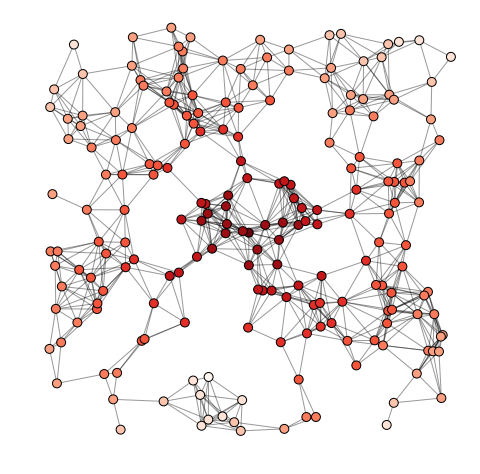

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.random_geometric_graph(200,0.125)
# position is stored as node attribute data for random_geometric_graph
pos=nx.get_node_attributes(G,'pos')

# find node near center (0.5,0.5)
dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d

# color by path length from node near center
p=nx.single_source_shortest_path_length(G,ncenter)

plt.figure(figsize=(8,8))
nx.draw_networkx_edges(G,pos,nodelist=[ncenter],alpha=0.4)
nx.draw_networkx_nodes(G,pos,nodelist=p.keys(),
                       node_size=80,
                       node_color=p.values(),
                       cmap=plt.cm.Reds_r)

plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.axis('off')
plt.savefig('random_geometric_graph.png')
plt.show()

In [7]:
#!/usr/bin/env python
"""
Sampson's monastery data.

Shows how to read data from a zip file and plot multiple frames.

"""
__author__ = """Aric Hagberg (hagberg@lanl.gov)"""
#    Copyright (C) 2010 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

import zipfile, cStringIO
import networkx as nx
import matplotlib.pyplot as plt

zf = zipfile.ZipFile('sampson_data.zip') # zipfile object
e1=cStringIO.StringIO(zf.read('samplike1.txt')) # read info file
e2=cStringIO.StringIO(zf.read('samplike2.txt')) # read info file
e3=cStringIO.StringIO(zf.read('samplike3.txt')) # read info file
G1=nx.read_edgelist(e1,delimiter='\t')
G2=nx.read_edgelist(e2,delimiter='\t')
G3=nx.read_edgelist(e3,delimiter='\t')
pos=nx.spring_layout(G3,iterations=100)
plt.clf()

plt.subplot(221)
plt.title('samplike1')
nx.draw(G1,pos,node_size=50,with_labels=False)
plt.subplot(222)
plt.title('samplike2')
nx.draw(G2,pos,node_size=50,with_labels=False)
plt.subplot(223)
plt.title('samplike3')
nx.draw(G3,pos,node_size=50,with_labels=False)
plt.subplot(224)
plt.title('samplike1,2,3')
nx.draw(G3,pos,edgelist=G3.edges(),node_size=50,with_labels=False)
nx.draw_networkx_edges(G1,pos,alpha=0.25)
nx.draw_networkx_edges(G2,pos,alpha=0.25)
plt.savefig("sampson.png") # save as png
plt.show() # display

IOError: [Errno 2] No such file or directory: 'sampson_data.zip'

In [8]:
import networkx as nx
G=nx.Graph()
G.add_node(1)
G.add_nodes_from([2,3])
H=nx.path_graph(10)
G.add_nodes_from(H)
G.add_node(H)
G.add_edge(1,2)
e=(2,3)
G.add_edge(*e)
G.add_edges_from([(1,2),(1,3)])

In [9]:
G.nodes()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,